In [ ]:
#ASSIGNMENT-1
#Task-2: Dialogue Act Recognition
#Using Bidirectional LSTM with Keras: Dialogue Act Recognition

In [1]:
#Importing the libraries
import numpy as np
import tensorflow as tf
from gensim.models import Word2Vec
from nltk.corpus import brown
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os

C:\Users\hasik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\hasik\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
from nltk.corpus import nps_chat as nps

In [3]:
def get_dialogue_data(output_file):
    open(output_file, 'w').close();
    tagged_sents=brown.tagged_sents()
    with open(output_file,'a') as fileWrite:
        for sentence in tagged_sents:
            for tuple_word in sentence:
                fileWrite.write(tuple_word[0]+'\t'+tuple_word[1])
                fileWrite.write('\n')
                fileWrite.write('\n')
                fileWrite.write('\n')

In [4]:
def get_sentence_data(output_file):
    open(output_file,'w').close();
    sentences=brown.sents()
    with open(output_file,'a') as fileWrite:
        for eachSentence in sentences:
            fileWrite.write(' '.join(eachSentence))
            fileWrite.write('\n')

In [5]:
def get_dialogue_data(output_file):
    open(output_file,'w').close();
    posts=nps.xml_posts()
    with open(output_file,'a') as fileWrite:
        for eachPost in posts:
            fileWrite.write(eachPost.get('class').lower()+'\t'+eachPost.text)
            fileWrite.write('\n')

In [6]:
#print("preparing module")
data_folder='C:\masters\Applying ML in CL\Assignment_2\dialogue'
output_file='test.txt'
get_dialogue_data(data_folder+'/'+output_file)
output_file='data.txt'
get_dialogue_data(data_folder+'/'+output_file)


preparing module


In [7]:
#Representing the each row of the input as a sequence of word indices.
maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
ftrain = open(os.path.join("C:\masters\Applying ML in CL\Assignment_2\dialogue", "data.txt"), 'rb')
for line in ftrain:
    label, sentence = line.strip().split(b"\t")
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()
#print(len(word_freqs))


In [8]:
MAX_FEATURES = 6000 
MAX_SENTENCE_LENGTH = 40
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in
enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

In [9]:
#Building the Data
labels=[]
file_name="data.txt"
file_path="C:\masters\Applying ML in CL\Assignment_2\dialogue"
with open(os.path.join(file_path,file_name),'r') as fileRead:
    for line in fileRead:
        l=line.split("\t")
        #print(l[0])
        labels.append(l[0])
label_set_list=list(set(labels))
nos_labels=len(label_set_list)

In [10]:
#Building the data sets to feed to the network and converting the input sentences to into a word sequence.
X = np.empty((num_recs, ), dtype=list)
y = np.zeros((num_recs, nos_labels))
i = 0
ftrain = open(os.path.join("C:\masters\Applying ML in CL\Assignment_2\dialogue", "data.txt"), 'rb')
for line in ftrain:
    label, sentence = line.strip().split(b"\t")
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    label=label.decode("ascii","ignore").lower()
    seqs = []
    dummy_vec=[0]*nos_labels
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    dummy_vec[label_set_list.index(label)]=1
    y[i]=dummy_vec
    i+=1
    
ftrain.close()
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)


In [11]:
#Splitting the Data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Defining the model
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 100
BATCH_SIZE = 32
NUM_EPOCHS = 7
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
model.add(Bidirectional(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2)))
#model.add(dropout=0.2)
model.add(Dense(nos_labels, activation = "softmax") )
#model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [21]:
#Modelling the data
history = model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest))

Train on 8453 samples, validate on 2114 samples
Epoch 1/7
8453/8453 [==============================] - 67s 8ms/step - loss: 1.3899 - acc: 0.5858 - val_loss: 0.8872 - val_acc: 0.7455
Epoch 2/7
8453/8453 [==============================] - 49s 6ms/step - loss: 0.7371 - acc: 0.7944 - val_loss: 0.7032 - val_acc: 0.8103
Epoch 3/7
8453/8453 [==============================] - 50s 6ms/step - loss: 0.5175 - acc: 0.8602 - val_loss: 0.6728 - val_acc: 0.8231
Epoch 4/7
8453/8453 [==============================] - 50s 6ms/step - loss: 0.3791 - acc: 0.8945 - val_loss: 0.6953 - val_acc: 0.8217
Epoch 5/7
8453/8453 [==============================] - 52s 6ms/step - loss: 0.2871 - acc: 0.9185 - val_loss: 0.7671 - val_acc: 0.7928
Epoch 6/7
8453/8453 [==============================] - 51s 6ms/step - loss: 0.2341 - acc: 0.9338 - val_loss: 0.7322 - val_acc: 0.8273
Epoch 7/7
8453/8453 [==============================] - 47s 6ms/step - loss: 0.1889 - acc: 0.9465 - val_loss: 0.7566 - val_acc: 0.8236


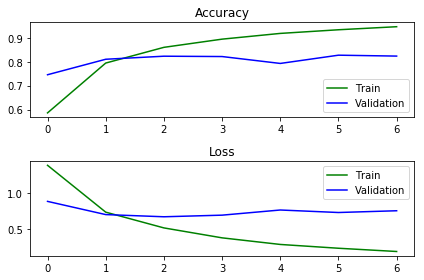

In [22]:
#Plotting the model
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="Train")
plt.plot(history.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()